# Clustering Crypto

In [43]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [44]:
# Load the crypto_data.csv dataset.
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [45]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
print(crypto_df.shape)
crypto_df.head(10)


(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [46]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis=1)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [47]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [48]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[~(crypto_df.TotalCoinsMined <= 0)]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [49]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = crypto_df[["CoinName"]]
print(crypto_names_df.shape)
crypto_names_df.head()

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [50]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df.drop(columns="CoinName", inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [51]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled[0:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Deliverable 2: Reducing Data Dimensions Using PCA

In [53]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.34429843,  0.97916524, -0.60646192],
       [-0.32760787,  0.97936549, -0.60697372],
       [ 2.2975326 ,  1.63373402, -0.75714579],
       ...,
       [ 0.32641833, -2.28249322,  0.41287979],
       [-0.12330168, -2.09406979,  0.4760163 ],
       [-0.28178669,  0.86249185, -0.27382194]])

In [54]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_names_df.index)
print(pcs_df.shape)
pcs_df.head(10)

(532, 3)


,PC 1,PC 2,PC 3
42,-0.344298,0.979165,-0.606462
404,-0.327608,0.979365,-0.606974
1337,2.297533,1.633734,-0.757146
BTC,-0.147934,-1.310167,0.195684
ETH,-0.157224,-1.997061,0.357816
LTC,-0.166630,-1.137629,-0.008500
DASH,-0.398760,1.210293,-0.523961
XMR,-0.151665,-2.122906,0.377079
ETC,-0.155663,-1.997151,0.357787
ZEC,-0.123301,-2.094070,0.476016


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [58]:
# Create an elbow curve to find the best value for K.
# Initialize empty inertia list
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\18586\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [59]:
# Initialize the K-Means model.
km_model = KMeans(n_clusters=4, random_state=0)

# Fit the model
km_model.fit(pcs_df)

# Predict clusters
predictions = km_model.predict(pcs_df)
predictions

array([3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3,
       3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3,

In [60]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join="inner")

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_names_df.CoinName

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = km_model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.344298,0.979165,-0.606462,42 Coin,3
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.327608,0.979365,-0.606974,404Coin,3
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.297533,1.633734,-0.757146,EliteCoin,3
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.147934,-1.310167,0.195684,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.157224,-1.997061,0.357816,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.166630,-1.137629,-0.008500,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.398760,1.210293,-0.523961,Dash,3
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.151665,-2.122906,0.377079,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.155663,-1.997151,0.357787,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.123301,-2.094070,0.476016,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

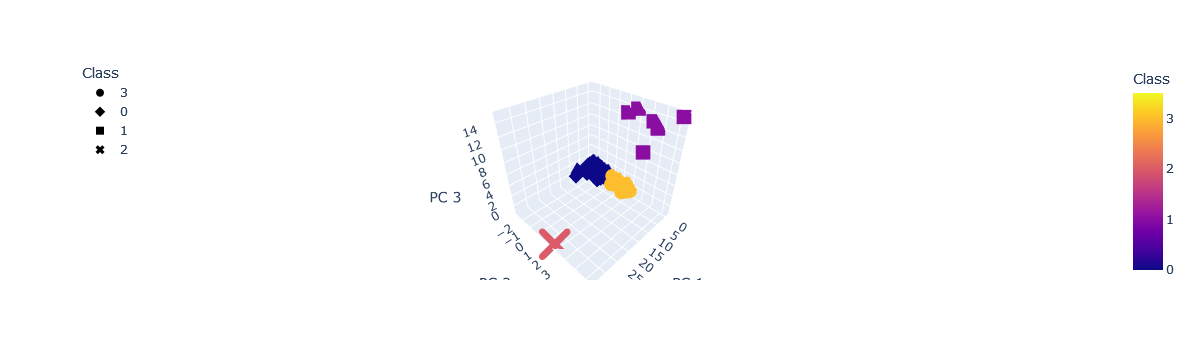

In [61]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3", color="Class", symbol="Class", width=800, 
                    hover_name="CoinName", hover_data=["Algorithm"])
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [62]:
# Create a table with tradable cryptocurrencies.
tradable_crypto_table = clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", 
                                                  "TotalCoinsMined", "Class"], sortable=True, selectable=True)
tradable_crypto_table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [63]:
# Print the total number of tradable cryptocurrencies.
print(f'There are {len(clustered_df)} tradable cryptocurrencies.')

There are 532 tradable cryptocurrencies.


In [64]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
X_cluster = clustered_df[["TotalCoinSupply", "TotalCoinsMined"]].copy()
X_cluster_scaled = MinMaxScaler().fit_transform(X_cluster)
X_cluster_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [65]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(X_cluster_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df.CoinName

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df.Class

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,3
404,5.320000e-04,0.001066,404Coin,3
1337,3.141593e-01,0.029576,EliteCoin,3
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,3
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [73]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"], by="Class")

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)